In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive

/content/gdrive/My Drive/Colab_Notebooks/Ociuz/3.Stress_Detection


In [ ]:
!ls

 Part_2_Test.ipynb
'Stress Detection In IT Professional by Image Processing and Machine Learning.docx'
 StressPPT.pptx


In [ ]:
# import nevcessary libraries

import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

In [ ]:
!ls

 haarcascade_frontalface_default.xml
 model.h5
 Part_2_Test.ipynb
'Stress Detection In IT Professional by Image Processing and Machine Learning.docx'
 StressPPT.pptx
 test1.jpg


In [ ]:
# Load the  trained model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# load the trained model

model.load_weights('model.h5')

In [ ]:
# Face cascade to detect faces

facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
# Read the test image

image = cv2.imread('test1.jpg')

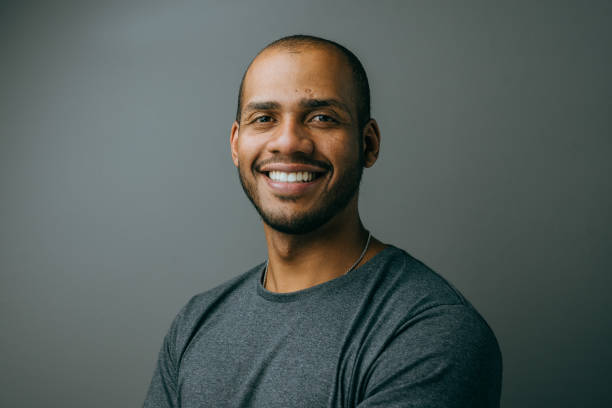

In [ ]:
cv2_imshow(image)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [ ]:
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = model.predict(cropped_img)
  maxindex = int(np.argmax(prediction))
  cv2.putText(image, emotion_dict[maxindex], (x+20, y+60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


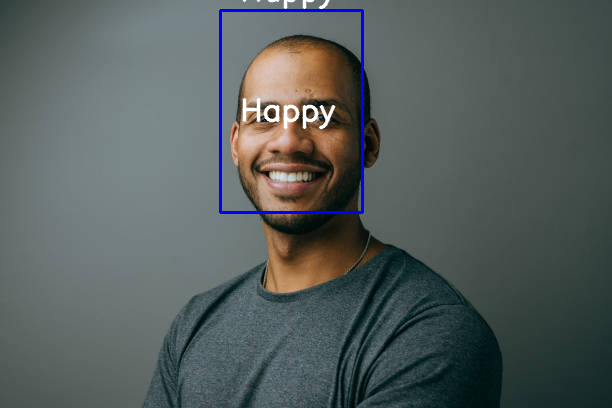

In [ ]:
cv2_imshow(image)

## test another image

In [ ]:
# Read the test image

image = cv2.imread('test2.jpg')
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = model.predict(cropped_img)
  maxindex = int(np.argmax(prediction))
  cv2.putText(image, emotion_dict[maxindex], (x+20, y+60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

## test another image

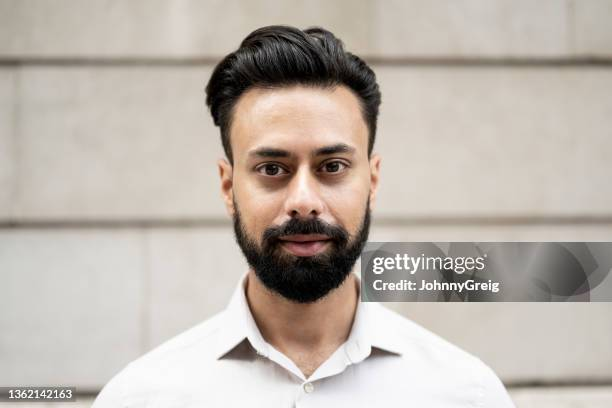

In [ ]:
# Read the test image

image = cv2.imread('test3.jpg')
cv2_imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


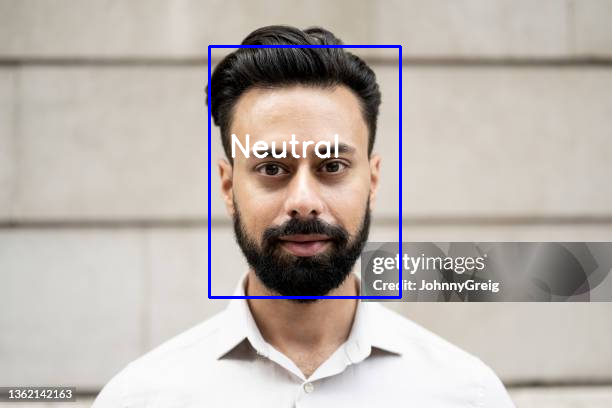

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = model.predict(cropped_img)
  maxindex = int(np.argmax(prediction))
  cv2.putText(image, emotion_dict[maxindex], (x+20, y+60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

cv2_imshow(image)

## test another image

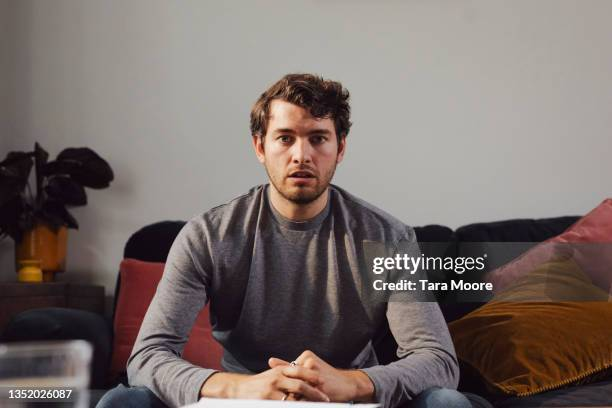

In [ ]:
# Read the test image

image = cv2.imread('test4.jpg')
cv2_imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


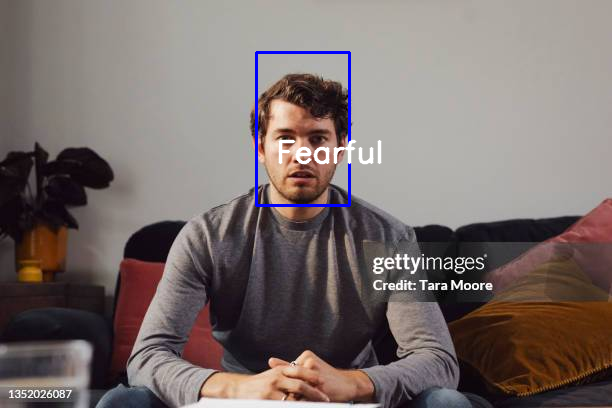

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = model.predict(cropped_img)
  maxindex = int(np.argmax(prediction))
  cv2.putText(image, emotion_dict[maxindex], (x+20, y+60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

cv2_imshow(image)